## Imports:

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ftfy import fix_text #fix text encoding issues
import requests #to get data from api

from sklearn.linear_model import LinearRegression

print(os.getcwd())

inpath = os.path.join(
    os.getcwd(),
    "..",
    "Data",
    "DKHousingPricesSample100k.csv",
)

#load data


df = pd.read_csv(inpath)

## Understanding the DataFrame
We start by looking at the data. We want to understand what the columns mean, and what the data looks like.




In [2]:
#print(df.columns)
df.head(10)

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.6500,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.0500,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.0000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.4400,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.3650,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN
5,2024-10-22,2024Q4,82,Villa,regular_sale,1858,1850000,0.0,5,154.0,12012.9870,Lehnskovvej 220,5700,Svendborg,Fyn & islands,Fyn & islands,3.1,NaN,NaN
6,2024-10-22,2024Q4,100,Summerhouse,regular_sale,1970,360000,0.0,3,42.0,8571.4290,Alkærvej 9,2740,Skovlunde,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
7,2024-10-21,2024Q4,125,Townhouse,family_sale,1980,700000,0.0,2,62.0,11290.3220,Kirkebyen 3F,7950,Erslev,South jutland,Jutland,3.1,NaN,NaN
8,2024-10-20,2024Q4,150,Villa,regular_sale,1943,500000,0.0,6,202.0,2475.2476,Smedegade 15,6535,Branderup J,South jutland,Jutland,3.1,NaN,NaN
9,2024-10-18,2024Q4,177,Villa,regular_sale,1976,850000,-13.0,4,118.0,7203.3896,Overmarken 26,6670,Holsted,South jutland,Jutland,3.1,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   date                                 100000 non-null  object 
 1   quarter                              100000 non-null  object 
 2   house_id                             100000 non-null  int64  
 3   house_type                           100000 non-null  object 
 4   sales_type                           100000 non-null  object 
 5   year_build                           100000 non-null  int64  
 6   purchase_price                       100000 non-null  int64  
 7   %_change_between_offer_and_purchase  100000 non-null  float64
 8   no_rooms                             100000 non-null  int64  
 9   sqm                                  100000 non-null  float64
 10  sqm_price                            100000 non-null  float64
 11  address       

There are 100,000 rows and 18 columns. For new, **we will consider a few columns**:
* **price**: the price of the house in DKK
* **house_type**: the type of house (e.g. villa, apartment, etc.)
* **city**: the city where the house is located
* **region**: the region where the house is located

**We might also consider**:
* **sqm**: the size of the house in square meters
* **rooms**: the number of rooms in the house
* **year_built**: the year the house was built
* **date, quarter_sold, year_sold**: when the house was sold
* **sale_type**: the type of sale (e.g. family sale, regular sale, etc.)

## Data Cleaning
We can see that there are some missing values for city, but none for zip_code. Lets inspect those rows with missing city.

In [4]:
df[df["city"].isna()]

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
7358,2023-06-08,2023Q2,96847,Villa,regular_sale,1979,1700000,0.0,3,63.0,26984.1270,Søndenom 11,8799,NaN,East & mid jutland,Jutland,2.60,3.31,4.79
12234,2022-06-09,2022Q2,173270,Villa,regular_sale,1882,1200000,0.0,4,152.0,7894.7370,Tunø Hovedgade 37,8799,NaN,East & mid jutland,Jutland,0.00,7.70,3.73
16138,2021-10-30,2021Q4,232218,Summerhouse,family_sale,1975,612000,0.0,3,69.0,8869.5650,Revet 20,8799,NaN,East & mid jutland,Jutland,0.00,1.85,1.47
35666,2018-12-21,2018Q4,527555,Farm,family_sale,1926,935000,0.0,5,166.0,5632.5303,Avrevej 75,8799,NaN,East & mid jutland,Jutland,0.00,0.81,2.12
44934,2016-07-11,2016Q3,666047,Summerhouse,regular_sale,1973,1250000,0.0,3,58.0,21551.7250,Revet 35,8799,NaN,East & mid jutland,Jutland,0.00,0.25,2.55
53125,2014-04-13,2014Q2,791639,Villa,regular_sale,1974,1100000,-19.0,6,180.0,6111.1113,Søndenom 5,8799,NaN,East & mid jutland,Jutland,0.00,0.56,3.06
63952,2009-12-06,2009Q4,956512,Farm,regular_sale,1915,1173800,0.0,4,152.0,7722.3687,Tunø Hovedgade 16,8799,NaN,East & mid jutland,Jutland,1.00,1.30,5.50
65377,2009-04-24,2009Q2,977298,Summerhouse,regular_sale,1919,800000,0.0,7,79.0,10126.5820,Tunø Hovedgade 72,8799,NaN,East & mid jutland,Jutland,2.00,1.30,5.50
66061,2008-11-27,2008Q4,987940,Summerhouse,family_sale,1973,518500,0.0,3,42.0,12345.2380,Stenkalven 71,8799,NaN,East & mid jutland,Jutland,4.25,3.42,6.52
69069,2007-09-21,2007Q3,1032983,Villa,regular_sale,1850,1000000,0.0,4,98.0,10204.0820,Tunø Hovedgade 100,8799,NaN,East & mid jutland,Jutland,4.00,1.69,5.70


It turns out that these have the same zip code, which is located in Tunø. Let's inspect the city names a bit further.

In [5]:
df["city"].value_counts().sort_index(ascending=False)

city
Ølstykke          2
Årre              1
Ãrøskøbing      73
Ã
rslev         146
Ã
rre            66
               ... 
Aalborg Ast      84
Aalborg        1136
Aakirkeby       140
Aabybro         192
Aabenraa        532
Name: count, Length: 607, dtype: int64

Here we can see that there are some encoding issues. At least, I've never heard of Ãrøskøbing or København A.
These errors can also be found in street names.


In [6]:
print("example of bad encoding: \n", df.loc[68978, ["city", "address"]])

example of bad encoding: 
 city           Ãrslev
address    Ãløkken 41
Name: 68978, dtype: object


As I mentioned, we have the zip code, so we can use that to look up the correct city names.
We can use the API from dataforsyningen.dk to get the correct city names.


In [7]:
resp = requests.get("https://api.dataforsyningen.dk/postnumre", timeout=30)
resp.raise_for_status()
postnumre = resp.json()


By getting the data from the API, we can create a mapping from zip code to city name using a dictionary comprehension.

But first, the zip codes in our dataframe are integers, while the API returns them as strings. We need to convert them to integers.

In [8]:
zip_to_city = {item["nr"]: item["navn"] for item in postnumre}
zip_to_city = {int(k): fix_text(v) for k, v in zip_to_city.items()} #convert keys to int and fix text encoding issues

df["imputed_city"] = df["zip_code"].map(zip_to_city)

Lets compare the original city names with the imputed ones.

In [9]:
#select cities where city is not equal to imputed_city
df.loc[(df["city"] != df["imputed_city"]), ["city", "imputed_city"]].value_counts()

city          imputed_city
København A   København Ø     721
Alstykke      Ølstykke        301
Randers SA    Randers SØ      281
Randers NA    Randers NØ      261
Vejle Ast     Vejle Øst       188
Odense SA     Odense SØ       176
Ã
byhøj       Åbyhøj          167
Aalborg SA    Aalborg SØ      161
Esbjerg A     Esbjerg Ø       149
Ã
rslev       Årslev          146
Ã
lbæk        Ålbæk           122
Odense NA     Odense NØ       107
Alsted        Ølsted          100
Algod         Ølgod            98
Ã
lsgårde     Ålsgårde         93
Arsted        Ørsted           93
Aalborg Ast   Aalborg Øst      84
Arbæk         Ørbæk            81
Astbirk       Østbirk          76
Ãrøskøbing   Ærøskøbing       73
Ã
rre         Årre             66
Astervrå      Østervrå         44
Arum Djurs    Ørum Djurs       41
Astermarie    Østermarie       34
Aster Assels  Øster Assels     33
Søby Ãrø     Søby Ærø         29
Arnhøj        Ørnhøj           27
Aster Ulslev  Øster Ulslev     19
Name: count, dtype: i

This looks good. We can now replace the original city names with the imputed ones.

In [10]:
df["city"] = df["imputed_city"]
df = df.drop(columns=["imputed_city"])

This issue also occurs in street names, but we cannot fix that with the zip code. We _could_ fix some of them with ftfy, but we are not going to use the column in our analysis, so we will leave it as is.

Lets move on to check that the data types are correct. But first, lets drop some columns we are not going to use. We keep house ID for duplicate checking.

In [11]:
df = df.drop(columns=["address", "zip_code", "%_change_between_offer_and_purchase", "yield_on_mortgage_credit_bonds%", "dk_ann_infl_rate%", "nom_interest_rate%", "sqm_price"])
df.dtypes

date               object
quarter            object
house_id            int64
house_type         object
sales_type         object
year_build          int64
purchase_price      int64
no_rooms            int64
sqm               float64
city               object
area               object
region             object
dtype: object

For some analyses, converting date to datetime could be useful. Quarter could also be split into year sold and quarter sold.

In [12]:
df["date"] = pd.to_datetime(df["date"])
df["year_sold"] = df["date"].dt.year
df["quarter_sold"] = df["date"].dt.quarter
df = df.drop(columns=["quarter"])
df.dtypes


date              datetime64[ns]
house_id                   int64
house_type                object
sales_type                object
year_build                 int64
purchase_price             int64
no_rooms                   int64
sqm                      float64
city                      object
area                      object
region                    object
year_sold                  int32
quarter_sold               int32
dtype: object

We should also make the categorical columns categorical.

In [13]:
df["house_type"] = df["house_type"].astype("category")
df["city"] = df["city"].astype("category")
df["region"] = df["region"].astype("category")
df["sales_type"] = df["sales_type"].astype("category")
df["area"] = df["area"].astype("category")
df.dtypes

date              datetime64[ns]
house_id                   int64
house_type              category
sales_type              category
year_build                 int64
purchase_price             int64
no_rooms                   int64
sqm                      float64
city                    category
area                    category
region                  category
year_sold                  int32
quarter_sold               int32
dtype: object

We are almost done with data cleaning. We should check for outliers and invalid values, as well as duplicates.

In [14]:
#check for outliers and invalid values
print("price min:", df["purchase_price"].min())
print("price max:", df["purchase_price"].max())
print("sqm min:", df["sqm"].min())
print("sqm max:", df["sqm"].max())
print("rooms min:", df["no_rooms"].min())
print("rooms max:", df["no_rooms"].max())
print("year_built min:", df["year_build"].min())
print("year_built max:", df["year_build"].max())

price min: 250200
price max: 45955000
sqm min: 26.0
sqm max: 984.0
rooms min: 1
rooms max: 15
year_built min: 1000
year_built max: 2024


There are certainly some outliers, esp. with year built and also somewhat with price. For year built, there are a bunch of houses built in 1000.

For the sake of consistency, we will remove the 5th percentile from year built. These are most likely houses that are bought for land value only, or houses that are so old that the year built is unknown.

In [15]:
df = df[df["year_build"] >= df["year_build"].quantile(0.05)]

Okay, lets check for duplicates.

In [16]:
duplicates = df.duplicated()
print("number of duplicates:", duplicates.sum())

number of duplicates: 0


## Exploratory Data Analysis
We are now ready to start analyzing the data. We will start by looking at the distribution of prices. Lets look at the distribution of prices by region and house type.
For the sake of simplicity, we will just look at the KDE plots to understand the distribution of prices.

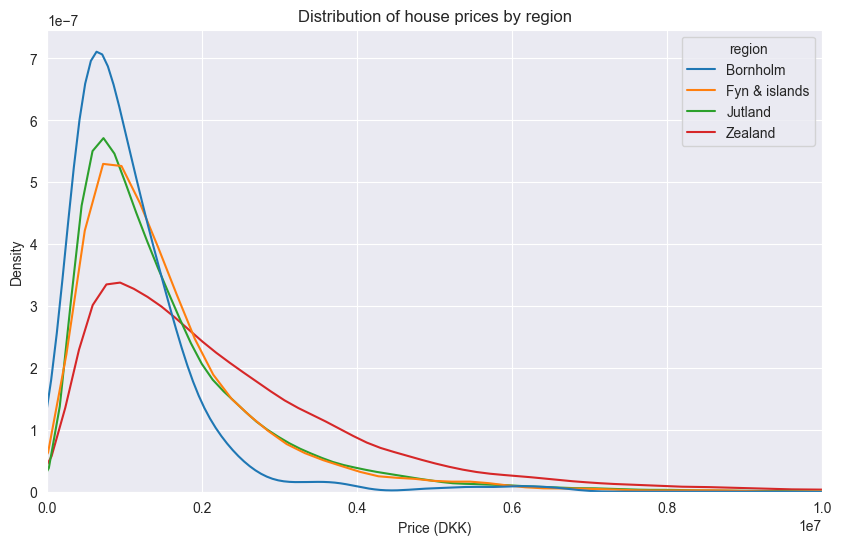

In [17]:
#distribution by region, just show kde
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="purchase_price", hue="region", common_norm=False)
plt.title("Distribution of house prices by region")
plt.xlabel("Price (DKK)")
plt.xlim(0, 10_000_000) #limit x axis to
plt.show()

Okay, we can see that there are some differences in the distribution of prices by region. Zealand has a longer right tail and lower peak while Bornholm has a higher peak and shorter right tail. This is expected, as Zealand contains Copenhagen, which is the capital region and has some of the most expensive houses in Denmark.

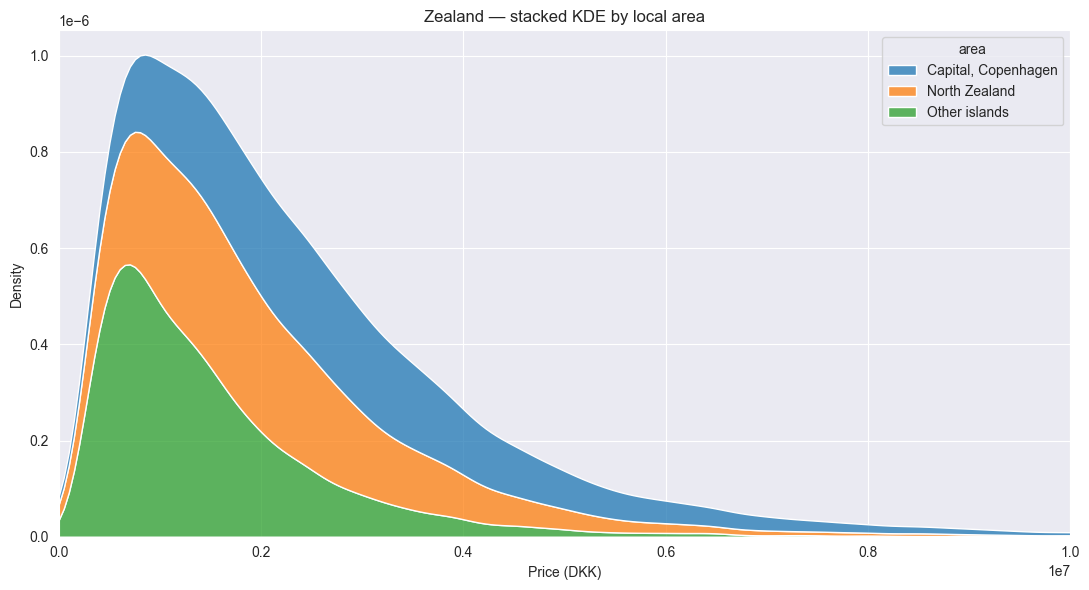

In [18]:
df_z = df.loc[df["region"].eq("Zealand")].dropna(subset=["purchase_price", "area"])
#drop unused categories in area
df_z["area"] = df_z["area"].cat.remove_unused_categories()

plt.figure(figsize=(11, 6))
sns.kdeplot(
    data=df_z,
    x="purchase_price",
    hue="area",
    fill=True,
    multiple="stack",    # or "fill" to show shares summing to 1 at each x
    common_norm=False,
    bw_adjust=0.9,
    clip=(0, 10_000_000),
)
plt.title("Zealand — stacked KDE by local area")
plt.xlabel("Price (DKK)")
plt.xlim(0, 10_000_000)
plt.tight_layout()
plt.show()


We see that from the right skew that Copenhagen indeed has the highest prices, followed by North Zealand and then the rest of Zealand.

The "Other islands" category is a misnomer, as it also includes the rest of Zealand. This could be fixed by adding a new category for "Rest of Zealand", but we will leave it as is.

Lets also look at the distribution by house type.

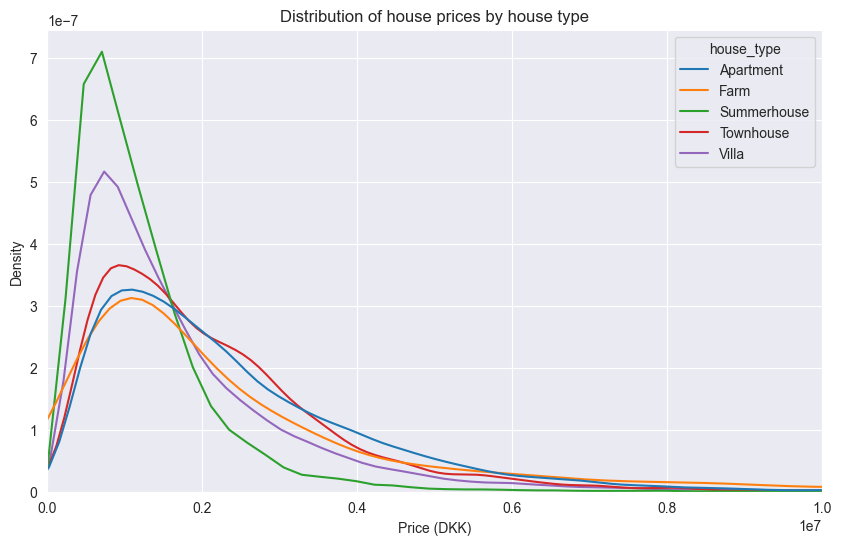

In [19]:
#kde by house type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="purchase_price", hue="house_type", common_norm=False)
plt.title("Distribution of house prices by house type")
plt.xlabel("Price (DKK)")
plt.xlim(0, 10_000_000) #limit x axis to
plt.show()

Summerhouses have the lowest prices, and apartments have the highest prices. This is expected, as summerhouses are often located in less expensive areas and are smaller than other house types.

Looking at the shapes from the kde plots, we can see that the housing market does not follow a normal distribution, more likely a log-normal distribution.

Lets move on to look at the average prices by region and house type in as simple bar plot. For this we include Copenhagen as a separate region, just to get a better understanding of the differences between rural and urban areas.

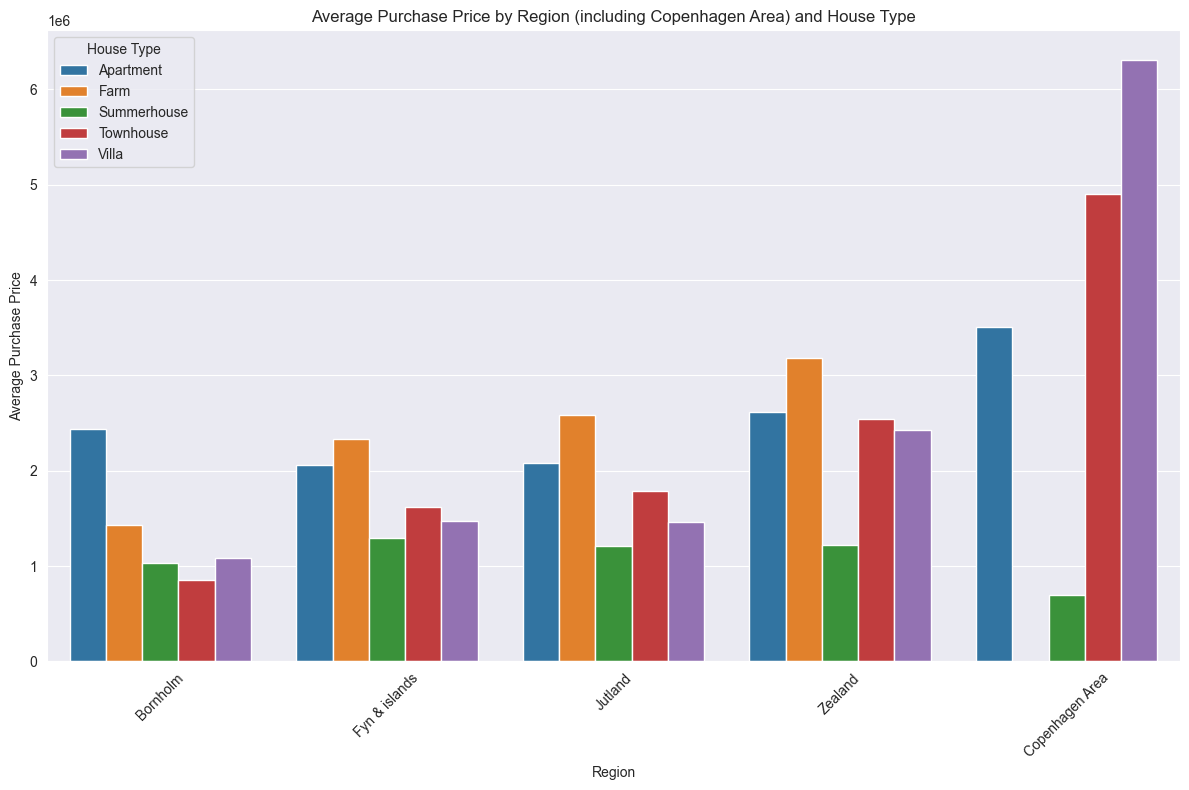

In [20]:
df["region_extended"] = df["region"].cat.add_categories("Copenhagen Area")



df.loc[df["city"].eq("Copenhagen") | df["city"].str.startswith("Frederiksberg"), "region_extended"] = "Copenhagen Area"
mean_prices_by_type_ext = df.groupby(["region_extended", "house_type"], observed=False)["purchase_price"].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_prices_by_type_ext, x="region_extended", y="purchase_price", hue="house_type")
plt.title("Average Purchase Price by Region (including Copenhagen Area) and House Type")
plt.xlabel("Region")
plt.ylabel("Average Purchase Price")
plt.legend(title="House Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


One interesting this to note is that the price of a Summerhouse is pretty consistent across regions. As mentioned, summerhouses are often located in less expensive areas. Another reason is that summerhouses are regulated differently than other house types (you can't live in them permanently), which limits their price. Also, Copenhagen is a clear outlier, with summerhouses being cheaper on average than summerhouses in other regions. Villas in Copenhagen are also on average considerably more expensive than apartments, which is not the case in other regions.

Lets look at the value counts of house types in Copenhagen.

In [21]:
#get value counts of house_type in copenhagen area
df_copenhagen = df[df["region_extended"] == "Copenhagen Area"]
print(df_copenhagen["house_type"].value_counts())

house_type
Apartment      880
Villa           45
Townhouse       26
Summerhouse      1
Farm             0
Name: count, dtype: int64


Okay, so that explains the discrepancy. There is a single summerhouse in the dataset, which is a clear outlier.



Lets move on to look at the relationship between size (sqm) and price. We will use a scatter plot with a regression line to visualize this relationship. Additionally, lets color the points by house type to see if there are any differences between house types.

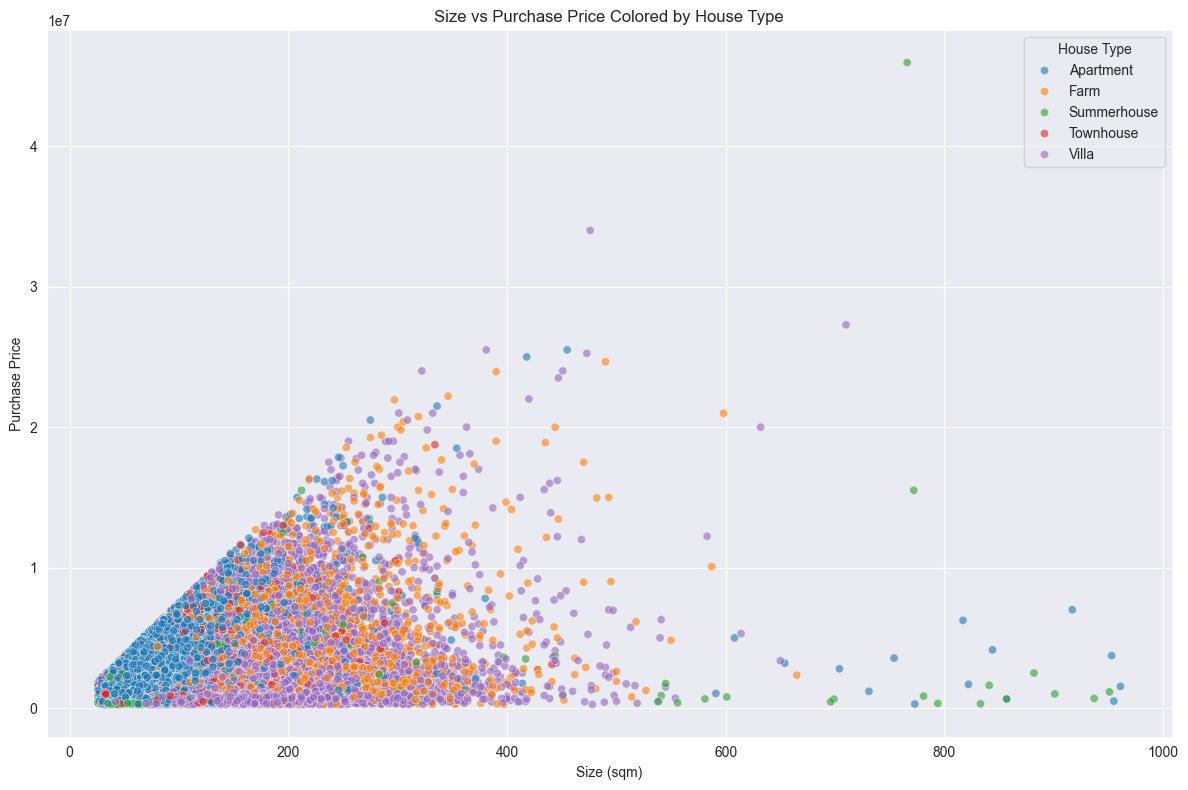

In [22]:
#scatterplot of size vs price colored by house type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="sqm", y="purchase_price", hue="house_type", alpha=0.6)
plt.title("Size vs Purchase Price Colored by House Type")
plt.xlabel("Size (sqm)")
plt.ylabel("Purchase Price")
plt.legend(title="House Type")
plt.tight_layout()
plt.show()

As can be seen here, apartments are generally smaller and more expensive per sqm, they seem to have a much stronger correlation between size and price. Villas and summerhouses are generally larger and less expensive per sqm, and they have a weaker correlation between size and price. Let's do some simple linear regression to quantify this.

In [23]:
#r-squared value
X = df[["sqm"]].values
y = df["purchase_price"].values
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)
print("R-squared value:", r_squared)

#r-squared on apartments only
df_apartments = df[df["house_type"] == "Apartment"]
X_apartments = df_apartments[["sqm"]].values
y_apartments = df_apartments["purchase_price"].values
model_apartments = LinearRegression()
model_apartments.fit(X_apartments, y_apartments)
r_squared_apartments = model_apartments.score(X_apartments, y_apartments)
print("R-squared value for apartments:", r_squared_apartments)

#r-squared for copenhagen only
df_copenhagen = df[df["region_extended"] == "Copenhagen Area"]
X_copenhagen = df_copenhagen[["sqm"]].values
y_copenhagen = df_copenhagen["purchase_price"].values
model_copenhagen = LinearRegression()
model_copenhagen.fit(X_copenhagen, y_copenhagen)
r_squared_copenhagen = model_copenhagen.score(X_copenhagen, y_copenhagen)
print("R-squared value for Copenhagen:", r_squared_copenhagen)

#r-squared for apartments in copenhagen only
df_apartments_copenhagen = df_apartments[df_apartments["region_extended"] == "Copenhagen Area"]
X_apartments_copenhagen = df_apartments_copenhagen[["sqm"]].values
y_apartments_copenhagen = df_apartments_copenhagen["purchase_price"].values
model_apartments_copenhagen = LinearRegression()
model_apartments_copenhagen.fit(X_apartments_copenhagen, y_apartments_copenhagen)
r_squared_apartments_copenhagen = model_apartments_copenhagen.score(X_apartments_copenhagen, y_apartments_copenhagen)
print("R-squared value for apartments in Copenhagen:", r_squared_apartments_copenhagen)


R-squared value: 0.06419042206665804
R-squared value for apartments: 0.16836684706650473
R-squared value for Copenhagen: 0.2720281962007475
R-squared value for apartments in Copenhagen: 0.26679988437708124


This further supports the rural vs urban hypothesis. The correlation between size and price is strong in apartments, which are more common in urban areas. The correlation is also even stronger in Copenhagen, which has the highest population density.

As a final step in our exploratory analysis, we will look at the relationship between year sold and avg. price. We will use a simple histogram to visualize this relationship.

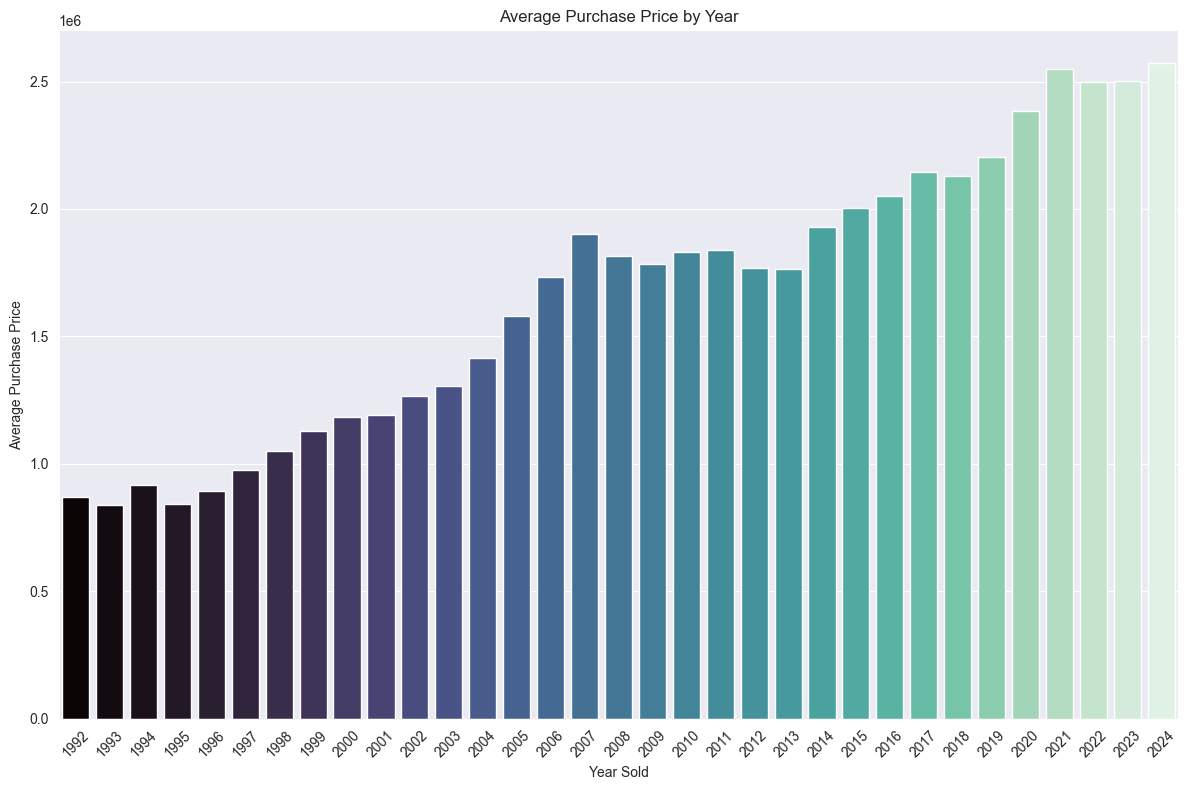

In [24]:

#histogram of average prices by year
mean_prices_by_year = df.groupby('year_sold')['purchase_price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_prices_by_year, x='year_sold', y='purchase_price', hue="year_sold", palette='mako', legend=False)
plt.title('Average Purchase Price by Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Purchase Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is pretty obvious, but the average price of houses has been increasing over the years. This is likely due to a combination of factors, including inflation and population growth.

##Conclusion
In this notebook, we have explored a dataset of housing prices in Denmark. We have cleaned the data, where we noted that:
* There are some encoding issues in the city names, which we were able to fix using the zip code and an external API.
* There were some outliers in the year built column, which we removed for consistency.
* There were no duplicates in the dataset.

Finally we performed some exploratory data analysis to understand the distribution of prices, the relationship between size and price, and the relationship between year sold and average price. We have also looked at the differences between regions and house types.

We have found that:
* The distribution of prices follows a log-normal distribution, with some differences between regions and house types.
* There is a weak correlation between size and price, which is strong for apartments and in urban areas.
* The average price of houses has been increasing over the years.
* Summerhouses have a pretty consistent price across regions, likely due to their regulation and location in less expensive areas.
* The capital region (Copenhagen Area) has significantly higher prices than other regions.
